# **Sorav Negi**
# **The Sparks Foundation**
# **GRIPMAR2021**

# **Task 6 - Prediction using Decision Tree Algorithm**
    In this task we create the Decision Tree classifier and visualize it graphically.
    The Main purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

## **Step 1 - Importing Libraries**

In [1]:
# Importing the required libraries

#For Data analysis
import pandas as pd
import numpy as np

#For Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#For Model Prediction
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score,confusion_matrix

## **Step 2 - Importing Data**

In [2]:
# Reading data

data_set = pd.read_csv("Iris.csv")
print("Data import successful")

Data import successful


**Data Analysis**

In [3]:
# See the first 5 rows

data_set.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Looking at the data, we can see that there is column 'Id' which is not necessary. So we are removing it using del method.**

In [4]:
# removing a column

del data_set['Id']
print("Id Column deleted successfully")

Id Column deleted successfully


In [5]:
# See the first 5 rows

data_set.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# shape of the data

data_set.shape

(150, 5)

**Looking at the shape, now we can see that there are 150 rows and 5 columns.**

### **#Checking for null values**

In [7]:
#checking for null values

data_set.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**There are no null values and hence data cleaning is not required**

In [8]:
# looking at the statistical measures 

data_set.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## **Step 3 - Input data Visualization**

### **#Scatter plot**

**Petal width Vs Petal length**

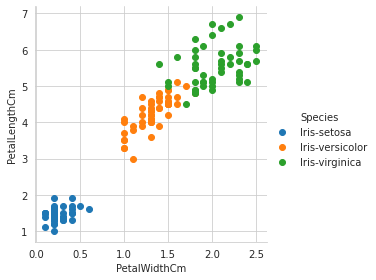

In [9]:
## Scatter plot between Petal width and petal length

sns.set_style("whitegrid")
sns.FacetGrid(data_set, hue="Species", height=4).map(plt.scatter, "PetalWidthCm", "PetalLengthCm").add_legend()
plt.show()

**Sepal width Vs Sepal length**

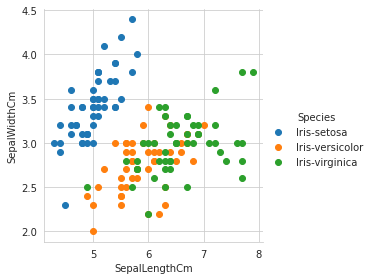

In [10]:
## Scatter plot between Sepal width and Sepal length

sns.set_style("whitegrid")
sns.FacetGrid(data_set, hue="Species", height=4).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend()
plt.show()

### **#Histogram plot**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7dc9a35510>,
      dtype=object)

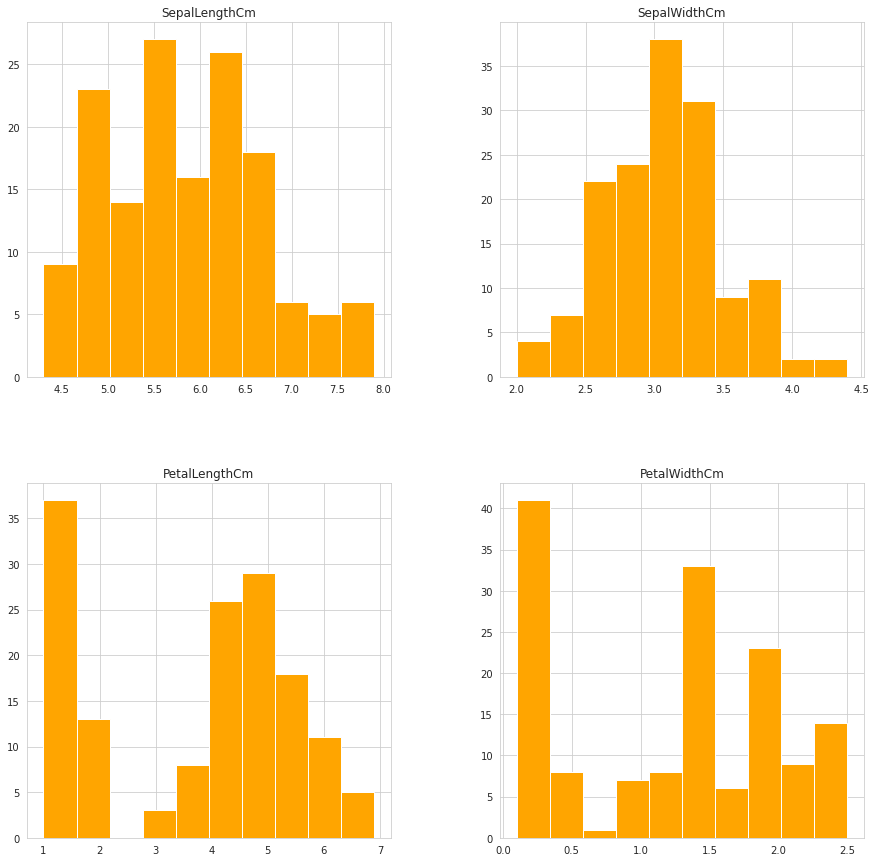

In [11]:
# Histogram plot of the given data 
data_set.hist(figsize = (15,15), color='orange')

### **#Paired plot**

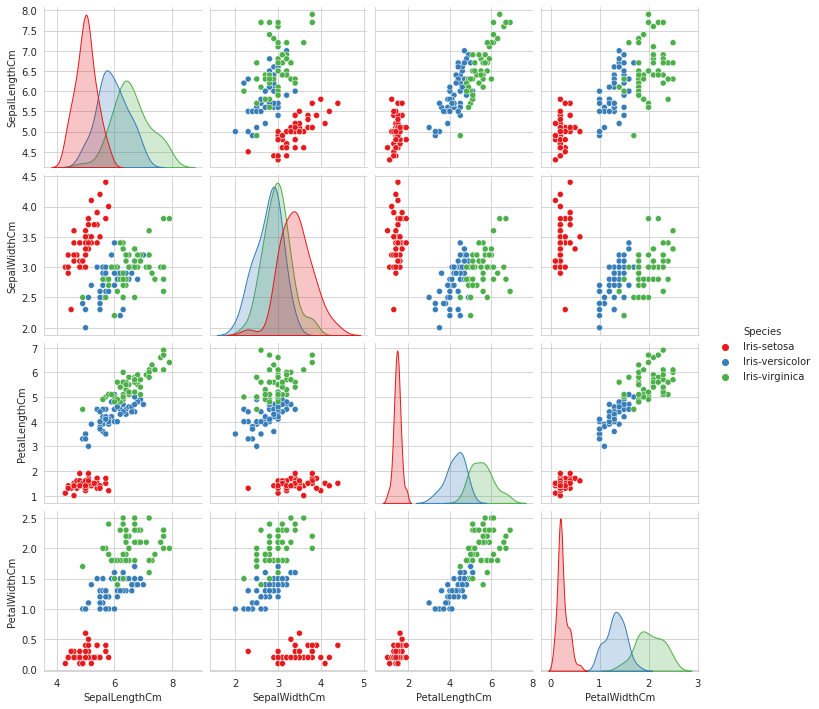

In [12]:
# Paired plot using seaborn

plt.close()
sns.set_style("whitegrid");
sns.pairplot(data_set, hue="Species", palette="Set1");
plt.show()

**Observation:**

From the above pair plot we can see that,

    1.Petal width and Petal Length of setosa species is easily separable.
    2.Sepal width and Sepal Length of all three species is overlapped.
    3.Petal length and petal width are more useful features to predict species type.

### **#Heatmap**

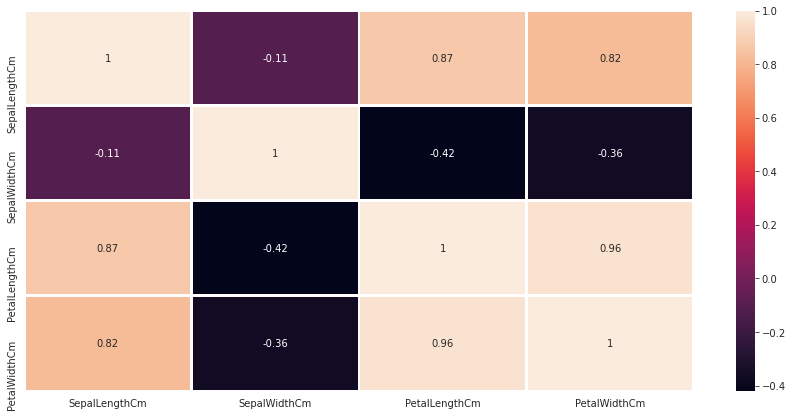

In [13]:
# Plotting on Heatmap
plt.figure(figsize=(15,7))
sns.heatmap(data_set.corr(), annot=True, linewidth=2)

**Observation:**

From the above heat map we can see that Sepal width and sepal length is slightly correlated with each other.

### **#Box plot**

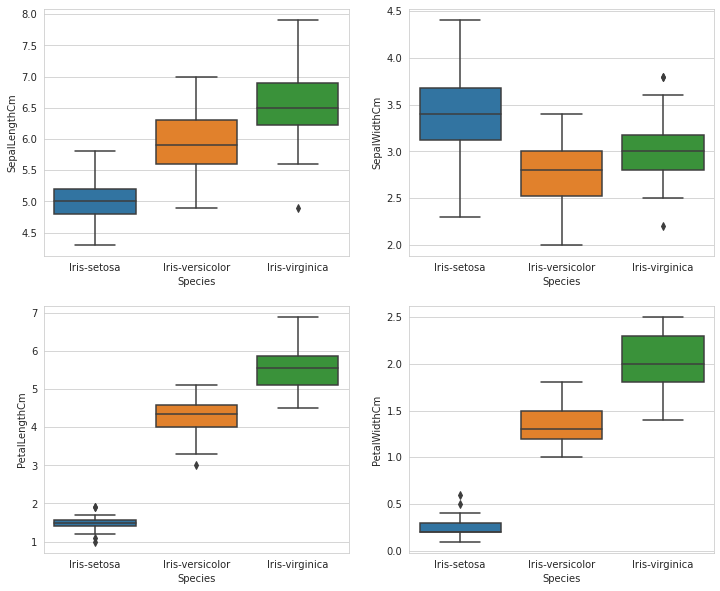

In [14]:
## Box plot
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x= 'Species',y= 'SepalLengthCm',data=data_set)
plt.subplot(2,2,2)
sns.boxplot(x= 'Species',y= 'SepalWidthCm' ,data=data_set)
plt.subplot(2,2,3)
sns.boxplot(x= 'Species' ,y= 'PetalLengthCm',data=data_set)
plt.subplot(2,2,4)
sns.boxplot(x='Species',y= 'PetalWidthCm',data=data_set)

**Observation:**

Above boxplot shows the distribution of the input variables and outliers. From the boxplot we can see that iris-setosa is negatively skewed and have few outliers and other species are normally distributed.

## **Step 4 - Data preprocessing**

In [15]:
A=data_set.iloc[:, :-1].values
sp=data_set.iloc[:, -1].values

**Encoding categorical data**

In [16]:
le = LabelEncoder()
B = le.fit_transform(sp)
print(B)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## **Step 5 - Splitting the dataset into the Training set and Test set**

In [17]:
A_train, A_test, B_train, B_test = train_test_split(A, B, test_size = 0.2, random_state = 1)
print("Train set:",A_train.shape)
print("Test set:",A_test.shape)

Train set: (120, 4)
Test set: (30, 4)


## **Step 6 - Building Decision Tree Classifier**

In [18]:
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt.fit(A_train, B_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

## **Step 7 - Evaluating Accuracy**

**For training data**

Accuracy of training data :  100.0 %
Confusin matrix of training data :'
'  [[39  0  0]
 [ 0 37  0]
 [ 0  0 44]]


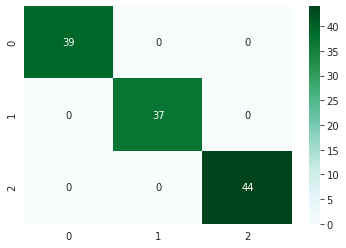

In [19]:
# Accuracy For training data
predict = dt.predict(A_train)
print("Accuracy of training data : ",accuracy_score(predict,B_train)*100,"%")
print("Confusin matrix of training data :'\n' ",confusion_matrix(predict,B_train))
sns.heatmap(confusion_matrix(predict,B_train),annot = True,cmap = 'BuGn')

**For testing data**

Accuracy of testing data :  96.66666666666667 %
Confusin matrix of testing data :
  [[11  0  0]
 [ 0 12  0]
 [ 0  1  6]]


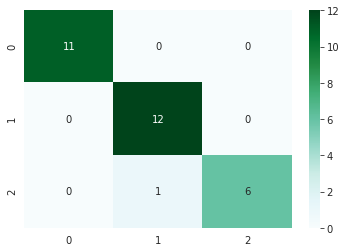

In [20]:
# Accuracy For testing data
predict = dt.predict(A_test)
print("Accuracy of testing data : ",accuracy_score(predict,B_test)*100,"%")
print("Confusin matrix of testing data :\n ",confusion_matrix(predict,B_test))
sns.heatmap(confusion_matrix(predict,B_test),annot = True,cmap = 'BuGn')

**Accuracy**

In [21]:
print("Accuracy:",accuracy_score(B_test,predict)*100)

Accuracy: 96.66666666666667


**Here we get accuracy of 96.66**

**#Predicted Species**

In [22]:
data_set['Predicted Species'] = [list(data_set['Species'].unique())[int(i)] for i in dt.predict(A)]
data_set

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Predicted Species
0,5.1,3.5,1.4,0.2,Iris-setosa,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,Iris-setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica,Iris-virginica


## **Step 8 - Visualization of Decision Tree**

**Installing required libraries**

In [23]:
# Install required libraries

!pip install pydotplus
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


**Visualizing the graph**

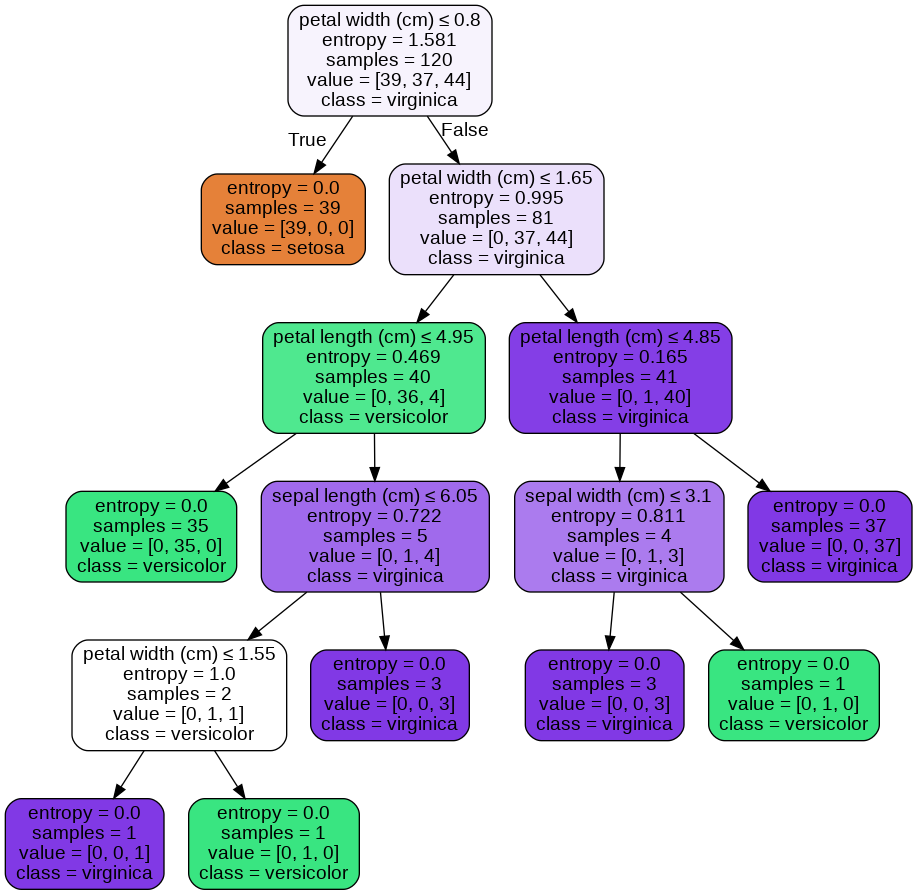

In [24]:
# Import necessary libraries for graph viz
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=fn, class_names=cn, filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())